## Description:
> 在这个项目中研究波士顿的房价，这个数据集中每一行数据是对波士顿周边或城镇房价的描述。 <br>
> 数据中包含14个特征和506条数据， 定义如下：
>> * CRIM: 城镇人均犯罪率
>> * ZN: 住宅用地所占比例
>> * INDUS: 城镇中非住宅用地所占比例
>> * CHAS：CHAS是虚拟变量， 用于回归分析
>> * NOX： 环保指数
>> * RM：每栋住宅的房间数
>> * AGE: 1940年以前建成的自住单位的比例
>> * DIS： 距离5个波士顿就业中心的加权距离
>> * RAD: 距离高速公路的便利指数
>> * TAX: 每一万美元的不动产税率
>> * PRTATIO: 城镇中的教师学生比例
>> * B: 城镇中的黑人比例
>> * LSTAT: 地区中有多少房东属于低收入人群
>> * MEDV: 自住房价中位数
>
> 通过对这些特征属性的描述，可以发现输入的特征属性的度量单位不统一，需要对数据进行度量单位的调整。
>
> 下面我们用之前学习的机器学习框架求解这个问题。

## 1. 定义问题 

### 1.1 导入类库

In [27]:
# 基础系列
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
# 预处理和模型选择系列
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# 模型系列
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
# 自动处理流程
from sklearn.pipeline import Pipeline
# 集成方法系列
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")  #Python的警告信息有时候很烦人，特别是因为软件版本引起的警告，这两行代码可以去掉python输出的警告

###  1.2 导入数据集

In [2]:
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRIATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filename, names=names, delim_whitespace=True)

## 2. 理解数据
> 对导入的数据进行分析，便于构建合适的模型<br>
> 比如：查看数据的维度、属性的字段类型、 数据本身

In [4]:
# 查看数据的基本属性
print(data.shape)
print(data.head(30))
print(data.dtypes)

(506, 14)
       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12

In [5]:
# 查看数据的统计属性
print(data.describe())

# 这些特征包含数据的最大值，最小值，中位数， 四分位数， 分析这些可以加深对数据分布，数据结构的理解

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PRIATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [6]:
# 查看关联关系
print(data.corr(method='pearson'))

# 分析这个可以看到有些特征属性之间具有强关联关系（>0.7  <-0.7）
# 比如：  NOX和INDUS   DIS和INDUS   TAX和INDUS  AGE和NOX DIS和NOX

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PRIATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

###  2.2 数据可视化

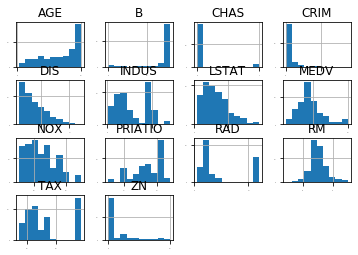

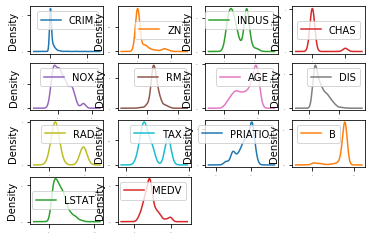

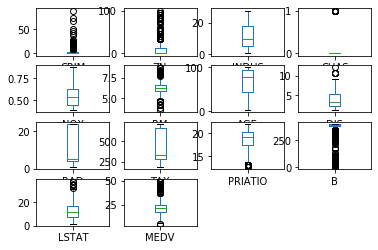

In [7]:
## 单一特征图表

# 直方图
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

# 从图中可以看出有些数据成指数分布： CRIM， ZN， AGE， B  有些数据呈双峰分布  RAD TAX

# 密度图
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, fontsize=1)
plt.show()

# 密度图可以展示这些数据的特征属性， 比直方图更加平滑的展示了这些数据特征

# 箱线图
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

# 箱线图可以查看每一个数据特征的状况，也可以很方便的看出数据分布的偏态程度

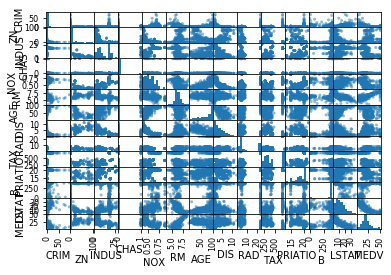

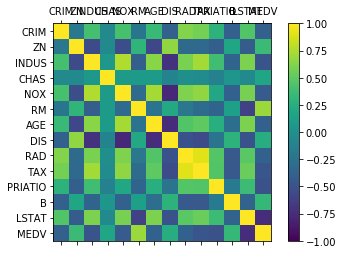

In [8]:
## 多重数据图表

# 散点矩阵图
scatter_matrix(data)
plt.show()

# 散点矩阵图表示因变量随着自变量变化的大致趋势， 据此可以选择合适的函数对数据点进行拟合。

# 相关矩阵图
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# 从图例可以看出，数据特征属性两两的相关性， 有些属性之间是强相关的，建议在后续的处理中移除这些特征属性，提高算法的准确度

### 思路总结：
> 通过数据的相关性和数据的分布发现，数据集中的数据结构比较复杂，需要考虑数据进行转换， 提高模型的准确度，可以尝试以下几个方面：
>> * 通过特征选择来减少大部分相关性高的特征
>> * 通过标准化数据来降低不同数据度量单位带来的影响
>> * 通过正态化数据来降低不同数据的分布结构， 提高算法的准确度

## 3. 评估算法

### 3.1 分离评估数据集
>分离出一个评估数据集是一个很好的注意，可以确保分离出的数据集和训练集完全隔离，训练完模型后，使用这个评估数据集确认模型的准确度。
> 80%的训练集， 20%的测试集

In [3]:
array = data.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

###  3.2 评估算法 --- 原始数据
> * 分析完数据不能立刻选择出哪个算法对需要解决的问题更有效<br>
> * 我们直观上认为， 由于部分数据呈线性分布，线性回归算法和弹性网络回归算法可能对解决问题比较有效， 由于数据的离散化， 通过决策树算法或
支持向量机算法也可以生成高精确度模型<br>
> * 所以到这里，我们依然不清楚哪个算法会生成准确度最高的模型，因此需要设计一个评估框架来选择合适的算法<br>
> * 在这里，采用10交叉验证来分离数据， 通过均方误差来比较算法的准确度， 误差越趋于0，准确度越高

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
CART: -25.257293 (11.692243)
KNN: -41.896488 (13.901688)
SVM: -85.518342 (31.994798)


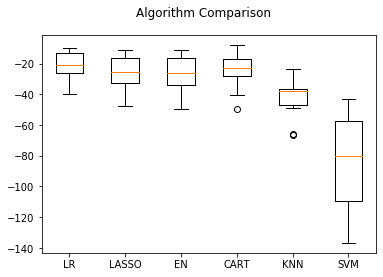

'从图中可以看出， 线性算法的性能稍微好一些， 分布也比较类似，K近邻算法的结果比较紧凑，不同的数据度量单位，\n也许是K近邻算法和支持向量机算法表现不好的原因， 下面对数据进行正态化处理，再次比较算法的结果'

In [28]:
# 评估算法 ---- 评估标准
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# 评估算法 --- baseline
models = {}
models['LR'] = LinearRegression()
models['LASSO'] = Lasso()
models['EN'] = ElasticNet()
models['CART'] = DecisionTreeRegressor()
models['KNN'] = KNeighborsRegressor()
models['SVM'] = SVR()

results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

# 评估算法 --- 箱线图
fig1 = plt.figure()
fig1.suptitle('Algorithm Comparison')
ax = fig1.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()


"""从图中可以看出， 线性算法的性能稍微好一些， 分布也比较类似，K近邻算法的结果比较紧凑，不同的数据度量单位，
也许是K近邻算法和支持向量机算法表现不好的原因， 下面对数据进行正态化处理，再次比较算法的结果"""

### 3.3 评估算法 --- 正态化数据
> * 在这里猜测也许因为原始数据中心不同特征属性的度量单位不一样， 导致有的算法不是很好。 接下来通过正态化，再次评估这些算法。
> * 在这里对训练数据进行转换处理， 讲所有的数据特征值转为0位中位值， 标准差是1的数据
> * 对数据正态化时， 为了防止数据泄露， 采用“Pipeline”来正态化数据和对模型进行评估

ScalerLR: -21.379856 (9.414264)
ScalerLASSO: -26.607314 (8.978761)
ScalerEN: -27.932372 (10.587490)
ScalerKNN: -20.107620 (12.376949)
ScalerCART: -24.685657 (8.733229)
ScalerSVM: -29.633086 (17.009186)


'可以发现， K近邻算法具有最优的MSE和最紧凑的数据分布'

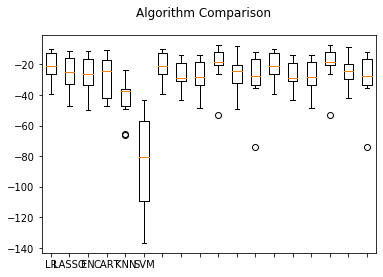

In [7]:
# 评估算法 --- 正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])
pipelines['ScalerEN'] = Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])

retults = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

# 评估算法 --- 箱线图
fig2 = plt.figure()
fig2.suptitle('Algorithm Comparison')
ax = fig2.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())

"""可以发现， K近邻算法具有最优的MSE和最紧凑的数据分布"""

## 4. 优化模型

### 4.1 调参改善算法
> 目前来看，K近邻算法对做过数据转换的数据集有很好的结果， 但是是否可以进一步对结果做一些优化呢？ 
> 
> K近邻算法的默认参数近邻个数是5， 下面通过网络搜索算法来优化算法

In [29]:
# 调参改善算法 ---  KNN
scaler = StandardScaler().fit(X_train)    # 计算训练集的平均值和标准差，以便测试数据集使用相同的变换
rescaledX = scaler.transform(X_train)      # 训练数据进行转换
param_grids = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}   # 网格搜索的目标参数
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grids, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：   %s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
print()
cv_results = zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))
    
"""可以看到， K近邻算法的最优近邻个数是3"""

最优：   -18.172136963696367 使用{'n_neighbors': 3}

-20.208663 (15.029652) with {'n_neighbors': 1}
-18.172137 (12.950570) with {'n_neighbors': 3}
-20.131163 (12.203697) with {'n_neighbors': 5}
-20.575845 (12.345886) with {'n_neighbors': 7}
-20.368264 (11.621738) with {'n_neighbors': 9}
-21.009204 (11.610012) with {'n_neighbors': 11}
-21.151809 (11.943318) with {'n_neighbors': 13}
-21.557400 (11.536339) with {'n_neighbors': 15}
-22.789938 (11.566861) with {'n_neighbors': 17}
-23.871873 (11.340389) with {'n_neighbors': 19}
-24.361362 (11.914786) with {'n_neighbors': 21}


'可以看到， K近邻算法的最优近邻个数是3'

### 4.2 集成算法 
> 下面对表现比较好的线性回归、K近邻、分类和回归树算法进行集成
>> * 装袋算法： 随机森林RFR和极端随机树ETR
>> * 提升算法： AdaBoostAB和随机梯度上升GBR
>
> 依然采用和前面同样的评估框架和正态化之后的数据分析相关算法

In [30]:
# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])
ensembles['ScaledAB-KNN'] = Pipeline([('Scaler', StandardScaler()), ('ABKNN', AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)))])
ensembles['ScaledAB-LR'] = Pipeline([('Scaler', StandardScaler()), ('ABLR', AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFR'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])
ensembles['ScaledETR'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])
ensembles['ScaledGBR'] = Pipeline([('Scaler', StandardScaler()), ('GBR', GradientBoostingRegressor())])

results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

"""与前面的线性算法和非线性算法对比，这次的准确度都有了较大的提高。 """

ScaledAB: -15.044311 (6.691461)
ScaledAB-KNN: -15.534612 (9.856507)
ScaledAB-LR: -24.175306 (8.952150)
ScaledRFR: -14.327801 (7.565964)
ScaledETR: -10.922548 (5.877761)
ScaledGBR: -9.941617 (4.467967)


'与前面的线性算法和非线性算法对比，这次的准确度都有了较大的提高。 '

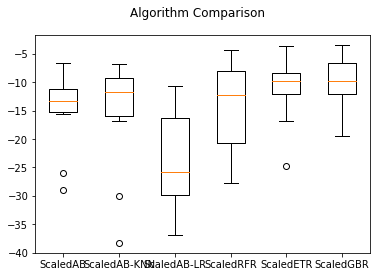

In [31]:
# 集成算法 --- 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()

###  4.3 集成算法调参
> 集成算法都有一个参数n_estimators, 这是一个很好的可以用来调整的参数。
>
> 下面对随机梯度上升(GBM)和极端随机树(ET)算法进行调参，再次比较这两个算法模型的准确度，来确定最终的算法模型

In [42]:
# 集成算法GBM --- 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring,  cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优： %s 使用 %s' % (grid_result.best_score_, grid_result.best_params_))

# 集成算法ET --- 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优： %s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优： -9.258470842261671 使用 {'n_estimators': 600}
最优： -9.10360345524348 使用{'n_estimators': 70}


## 5. 确定最终模型
> 已经确定了使用极端随机树算法生成模型， 下面就对该算法进行训练和生成模型

In [49]:
# 训练模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = ExtraTreesRegressor(n_estimators=70)
gbr.fit(X=rescaledX, y=Y_train)

# 评估算法模型
rescaledX_validation = scaler.transform(X_validation)
predictions = gbr.predict(rescaledX_validation)
print(mean_squared_error(Y_validation, predictions))
print(predictions)

15.150642517006805
[21.43857143 19.79       20.83571429 19.44714286  8.26142857  9.84428571
 21.89285714 23.28428571 24.10285714 15.3         8.12285714 32.42571429
 14.51285714 19.38285714 39.71714286 19.24428571 24.66142857 32.48428571
 15.22428571 21.76571429 16.07714286 27.86571429 44.38285714 19.56571429
 14.74285714  9.69571429 35.05714286 25.74428571 23.75428571 23.34571429
 19.05714286 29.69285714 29.15285714 15.19714286 41.74142857 18.79714286
 19.11285714 14.74714286 21.18285714 26.35142857 22.55857143 12.14714286
 15.53428571 25.82571429 18.57285714 11.38714286 21.74571429 20.14142857
 16.20857143 20.75428571 24.66428571 24.79571429 33.04142857 43.00714286
 12.66285714 21.65857143 18.04       20.63285714 22.30285714 20.72142857
 21.07571429 32.31428571 18.38       19.43428571 19.99571429 48.40142857
 15.58285714 19.97428571 21.4        28.32714286 23.62857143 10.83714286
 20.05285714 33.19       21.84714286 19.89       14.36285714 15.82428571
 31.01142857 19.05285714 16.8971

## 总结
> 本项目实例从问题定义开始， 直到最后的模型生成为止，完成了一个完整的机器学习项目。 下面对一些知识做一个整理
>> * [标准化数据-StandardScaler](https://www.cnblogs.com/cola-1998/p/10218276.html)
>> * [gridSearchCV（网格搜索）的参数、方法及示例](https://blog.csdn.net/weixin_41988628/article/details/83098130)
>> * [有关StandardScaler的transform和fit_transform方法](https://www.jianshu.com/p/2a635d9e894d)
>> * [sklearn.metrics.mean_squared_error](https://blog.csdn.net/Dear_D/article/details/86136779)